### Importación de datos



In [5]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


In [51]:
pip install matplotlib

In [52]:
import matplotlib.pyplot as plt

#1. Análisis de facturación



In [60]:
tiendas = [tienda1, tienda2, tienda3, tienda4]

In [7]:
def sumatoria(tiendas, columna):
  for tienda in tiendas:
    suma = sum(tiendas[columna])
  return suma

In [55]:
def conteo_columnas(tienda, columnas):
  categorias = tienda[columnas]
  conteo_categorias = {}

  for categoria in categorias:
      if categoria not in conteo_categorias:
        conteo_categorias[categoria] = 1
      else:
        conteo_categorias[categoria] += 1

  return conteo_categorias

In [59]:
lista_precio = []
for tienda in range(len(tiendas)):
  lista_precio.append(sumatoria(tiendas[tienda], 'Precio'))
  print(f"Ingreso total de la tienda {tienda + 1} es: {sumatoria(tiendas[tienda], 'Precio')}")


Ingreso total de la tienda 1 es: 1150880400.0
Ingreso total de la tienda 2 es: 1116343500.0
Ingreso total de la tienda 3 es: 1098019600.0
Ingreso total de la tienda 4 es: 1038375700.0


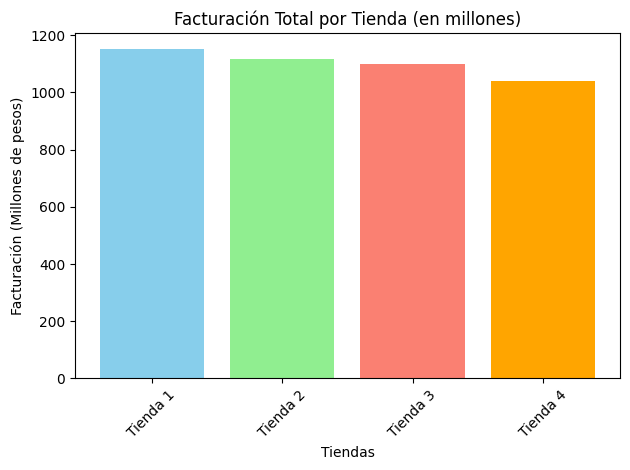

In [61]:
lista_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

precio_millones = [x / 1_000_000 for x in lista_precio]
colores = ["skyblue", "lightgreen", "salmon", "orange"]

plt.bar(lista_tiendas, precio_millones, color=colores)

plt.title("Facturación Total por Tienda (en millones)")
plt.xlabel("Tiendas")
plt.ylabel("Facturación (Millones de pesos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [62]:
def categoria_popular():
  for tienda in range(len(tiendas)):
    maximo = max(conteo_columnas(tiendas[tienda], "Categoría del Producto"), key=conteo_columnas(tiendas[tienda], "Categoría del Producto").get)
    cantidad = max(conteo_columnas(tiendas[tienda], "Categoría del Producto").values())
    print(f"Categoria más popular de la tienda {tienda + 1} es: {maximo} con: {cantidad}")


In [63]:
categoria_popular()

Categoria más popular de la tienda 1 es: Muebles con: 465
Categoria más popular de la tienda 2 es: Muebles con: 442
Categoria más popular de la tienda 3 es: Muebles con: 499
Categoria más popular de la tienda 4 es: Muebles con: 480


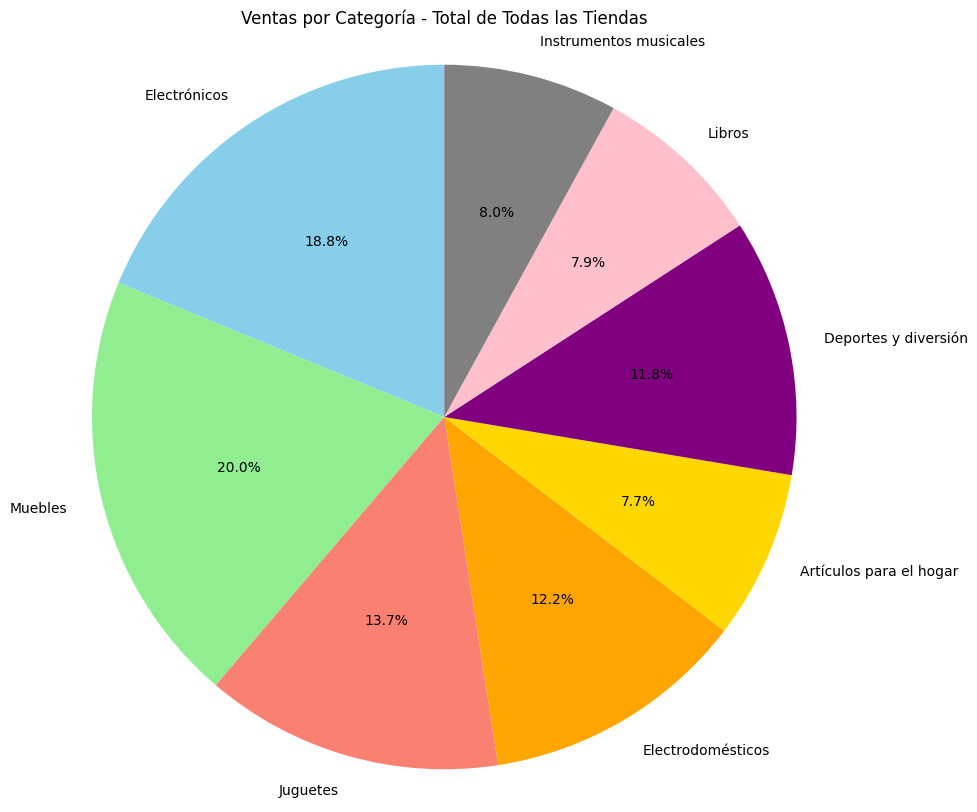

In [68]:
conteo_total = {}

for tienda in tiendas:
    conteo = conteo_columnas(tienda, "Categoría del Producto")
    for categoria, cantidad in conteo.items():
        if categoria in conteo_total:
            conteo_total[categoria] += cantidad
        else:
            conteo_total[categoria] = cantidad

categorias = list(conteo_total.keys())
ventas = list(conteo_total.values())

plt.figure(figsize=(10, 10))
colores = ["skyblue", "lightgreen", "salmon", "orange", "gold", "purple", "pink", "gray"]
plt.pie(ventas, labels=categorias, autopct='%1.1f%%', startangle=90, colors=colores)
plt.title("Ventas por Categoría - Total de Todas las Tiendas")
plt.axis('equal')
plt.show()


# 3. Calificación promedio de la tienda


In [20]:
def promedio_calificacion(tiendas):
  for i, tienda in enumerate(tiendas, start=1):
    suma = sumatoria(tienda, 'Calificación')
    longitud = len(tienda['Calificación'])
    promedio = suma / longitud
    print(f'La calificación promedio de la tienda {i} es: {promedio:.2f}')


In [65]:
promedio_calificacion(tiendas)

La calificación promedio de la tienda 1 es: 3.98
La calificación promedio de la tienda 2 es: 4.04
La calificación promedio de la tienda 3 es: 4.05
La calificación promedio de la tienda 4 es: 4.00


# 4. Productos más y menos vendidos

In [18]:
def productos_mas_menos_vendidos(tiendas):
  for tienda in range(len(tiendas)):
    mas_vendido = max(conteo_columnas(tiendas[tienda], 'Producto'), key=conteo_columnas(tiendas[tienda], 'Producto').get)
    menos_vendido = min(conteo_columnas(tiendas[tienda], 'Producto'), key=conteo_columnas(tiendas[tienda], 'Producto').get)
    print(f"El producto más vendido de la tienda {tienda + 1} es: {mas_vendido}")
    print(f"El producto menos vendido de la tienda {tienda + 1} es: {menos_vendido}\n")

In [19]:
productos_mas_menos_vendidos(tiendas)

El producto más vendido de la tienda 1 es: Microondas
El producto menos vendido de la tienda 1 es: Auriculares con micrófono

El producto más vendido de la tienda 2 es: Iniciando en programación
El producto menos vendido de la tienda 2 es: Juego de mesa

El producto más vendido de la tienda 3 es: Kit de bancas
El producto menos vendido de la tienda 3 es: Bloques de construcción

El producto más vendido de la tienda 4 es: Cama box
El producto menos vendido de la tienda 4 es: Guitarra eléctrica



# 5. Envío promedio por tienda

In [82]:
def envio_promedio(tiendas):
  costo_promedio_envio = []
  for i, tienda in enumerate(tiendas, start=1):
    suma = sumatoria(tienda, 'Costo de envío')
    longitud = len(tienda['Costo de envío'])
    promedio = suma / longitud
    costo_promedio_envio.append(round(promedio, 2))
  return costo_promedio_envio



In [84]:
envio_promedio(tiendas)
for tienda in range(len(tiendas)):
  print(f"El costo promedio de envío de la tienda {tienda + 1} es: {envio_promedio(tiendas)[tienda]}")

El costo promedio de envío de la tienda 1 es: 26018.61
El costo promedio de envío de la tienda 2 es: 25216.24
El costo promedio de envío de la tienda 3 es: 24805.68
El costo promedio de envío de la tienda 4 es: 23459.46


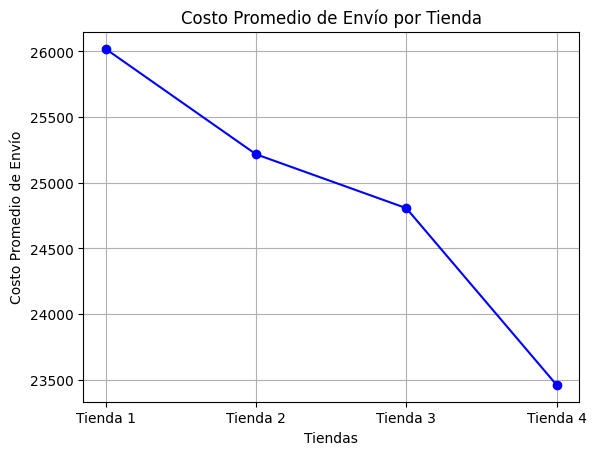

In [85]:

plt.plot(lista_tiendas, envio_promedio(tiendas), marker='o', linestyle='-', color='blue')
plt.title("Costo Promedio de Envío por Tienda")
plt.xlabel("Tiendas")
plt.ylabel("Costo Promedio de Envío")
plt.grid(True)
plt.show()


# Informe Final de Análisis de Tiendas

## Introducción
El presente informe tiene como objetivo analizar las ventas y el desempeño de cuatro tiendas, con el fin de recomendar al Sr. Juan la mejor opción para vender sus productos.  
El análisis se basó en factores clave como:
- Facturación total.
- Categorías más y menos vendidas.
- Calificaciones promedio de clientes.
- Productos más y menos vendidos.
- Costo promedio de envío.

Todos los análisis fueron respaldados por gráficos generados a partir de los datos reales.

---

## Análisis y Resultados

### 1. Ingresos Totales por Tienda
Se analizaron los ingresos totales de cada tienda:

- **Tienda 1:** $1,150,880,400

- **Tienda 2:** $1,116,343,500

- **Tienda 3:** $1,098,019,600

- **Tienda 4:** $1,038,375,700

> **Gráfico:** Ingresos totales por tienda (gráfico de barras).



```
lista_tiendas = ["Tienda 1", "Tienda 2", "Tienda 3", "Tienda 4"]

precio_millones = [x / 1_000_000 for x in lista_precio]
colores = ["skyblue", "lightgreen", "salmon", "orange"]

plt.bar(lista_tiendas, precio_millones, color=colores)

plt.title("Facturación Total por Tienda (en millones)")
plt.xlabel("Tiendas")
plt.ylabel("Facturación (Millones de pesos)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
```



---

### 2. Categoría Más Vendida por Tienda
En todas las tiendas, la categoría más popular fue **Muebles**:

- **Tienda 1:** 465 ventas.
- **Tienda 2:** 442 ventas.
- **Tienda 3:** 499 ventas.
- **Tienda 4:** 480 ventas.

> **Gráfico:** Distribución de ventas por categoría (gráfico de pastel consolidado).

---

### 3. Calificaciones Promedio de Clientes
Las calificaciones promedio reflejan la satisfacción del cliente:

- **Tienda 1:** 3.98
- **Tienda 2:** 4.04
- **Tienda 3:** 4.05
- **Tienda 4:** 4.00

> **Gráfico:** Calificaciones promedio por tienda (gráfico de líneas o barras).

---

### 4. Productos Más y Menos Vendidos
Productos más vendidos:
- **Tienda 1:** Microondas.
- **Tienda 2:** Iniciando en programación.
- **Tienda 3:** Kit de bancas.
- **Tienda 4:** Cama box.

Productos menos vendidos:
- **Tienda 1:** Auriculares con micrófono.
- **Tienda 2:** Juego de mesa.
- **Tienda 3:** Bloques de construcción.
- **Tienda 4:** Guitarra eléctrica.

---

### 5. Costo Promedio de Envío
Análisis del costo promedio de envío en cada tienda:

- **Tienda 1:** $26,018.61

- **Tienda 2:** $25,216.24

- **Tienda 3:** $24,805.68

- **Tienda 4:** $23,459.46

> **Gráfico:** Costos promedio de envío por tienda (gráfico de líneas).

---

## Conclusión y Recomendación

Tras el análisis, se concluye que:
- **Tienda 1** tiene los ingresos más altos, pero también el mayor costo de envío.
- **Tienda 3** y **Tienda 2** presentan buen equilibrio entre ingresos, calificaciones y costos de envío.
- **Tienda 3** destaca ligeramente por tener la mejor calificación promedio (4.05) y una de las categorías más fuertes en ventas.
- La categoría más vendida en todas las tiendas fue **Muebles**, lo que indica una fuerte demanda en este segmento.

**Recomendación Final:**  
Se recomienda que el Sr. Juan elija la **Tienda 3** para vender sus productos, ya que ofrece:
- La mejor calificación promedio de clientes.
- Buena facturación general.
- Costo de envío razonable.
- Alto volumen de ventas en categorías clave.

Esto garantiza un equilibrio entre rentabilidad, satisfacción del cliente y competitividad en costos.

---

